In [1]:
# import libraries
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#os.chdir("~/Desktop/WORK/AI-projects/Pnuemonia_Predictor_Project/xray_dataset_covid19")
#!ls

#f = open(os.path.expanduser("~/Desktop/WORK/AI-projects/Pnuemonia_Predictor_Project/xray_dataset_covid19"))

TRAIN_DIR = "~/Desktop/WORK/AI-projects/Pnuemonia_Predictor_Project/xray_dataset_covid19/train"
TEST_DIR = "~/Desktop/WORK/AI-projects/Pnuemonia_Predictor_Project/xray_dataset_covid19/test"

In [ ]:
# save the directory of the train images in images
images = '/content/drive/MyDrive/pneumonia_predictor/xray_dataset_covid19/train'

folders = os.listdir(images)
print(folders)

['NORMAL', 'PNEUMONIA']


In [ ]:
images

'/content/drive/MyDrive/pneumonia_predictor/xray_dataset_covid19/train'

In [ ]:
image_data = []
labels = []

label_dict = {
    'PNEUMONIA': 0,
    'NORMAL': 1
}

In [ ]:
#change the images into an array and save the images and labels in a list called image_data and labels respectively

from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array

for i in folders:
  path = os.path.join(images, i) # 'i' holds the label (e.g 'NORMAL')
  for x in os.listdir(path):
    img = load_img(os.path.join(path, x), target_size = (224, 224))
    img_array = img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[i]) # Use 'i' (the folder name) as the key for label_dict

In [ ]:
print(len(image_data), len(labels))

148 148


In [ ]:
print(type(image_data), type(labels))

<class 'list'> <class 'list'>


In [ ]:
# randomize the image_data and labels

import random
combined = list(zip(image_data, labels))
random.shuffle(combined)
image_data[:], labels[:] = zip(*combined)

In [ ]:
print (labels)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [ ]:
# turn the label and image data to an array
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape, y_train.shape)

(148, 224, 224, 3) (148,)


In [ ]:
#adjust the way the train images look

from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.01,
    height_shift_range = 0.01,
    horizontal_flip = False,
    vertical_flip = False,
)

augment.fit(x_train)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [ ]:
#inputting the images into conv2D and relu layers

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,512 (236.38 KB)

 Trainable params: 60,512 (236.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#the flatten and hidden layers

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="pneumonia_detection.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │       2,064,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,125,570 (8.11 MB)

 Trainable params: 2,125,570 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(x_train.shape, y_train.shape)

(148, 224, 224, 3) (148,)


In [ ]:
#calculating the loss and accuracy of the train and validation dataset

# Reshape y_train to have two output neurons, one-hot encoded
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=2)

hist = model.fit(x_train, y_train_encoded,
                 batch_size=32,
                 epochs=25,
                 validation_split=0.10, callbacks=callbacks_list)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4351 - loss: 57.4465
Epoch 1: val_loss improved from inf to 10.86921, saving model to pneumonia_detection.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4365 - loss: 57.3685 - val_accuracy: 0.3333 - val_loss: 10.8692
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5439 - loss: 7.0019
Epoch 2: val_loss improved from 10.86921 to 2.79515, saving model to pneumonia_detection.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5397 - loss: 6.9618 - val_accuracy: 0.3333 - val_loss: 2.7952
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6477 - loss: 2.8728
Epoch 3: val_loss improved from 2.79515 to 1.92114, saving model to pneumonia_detection.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6438 - loss: 2.8432 - val_accuracy: 0.6000 - val_loss: 1.9211
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7065 - loss: 1.8026
Epoch 4: val_loss improved from 1.92114 to 1.37476, sa

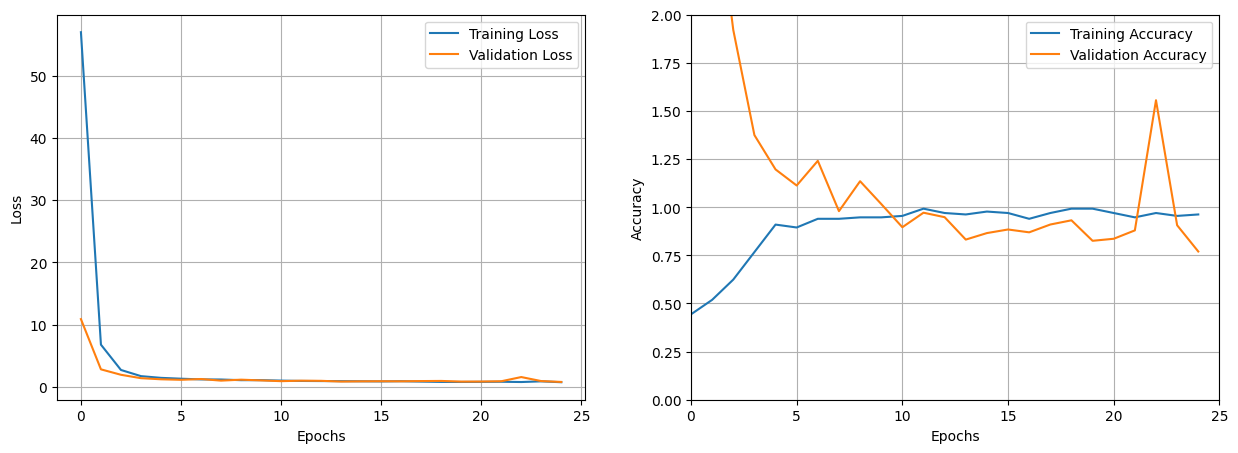

In [ ]:
# Plot two graphs one for the loss of the train and validation images, the other for the accuracy

plt.figure(1, figsize = (15,5))

plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history['loss'], label = "Training Loss")
plt.plot(hist.history['val_loss'], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 25)
plt.ylim(0, 2)
plt.plot(hist.history['accuracy'], label = "Training Accuracy")
plt.plot(hist.history['val_loss'], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=3f02df23132d554db5de3a6c687324dd75e5a2b4f10ce918a505ee95428f75b2
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
#repeat what was done for the train images on the test images
test_images = "/content/drive/MyDrive/pneumonia_predictor/xray_dataset_covid19/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'PNEUMONIA':0,
    'NORMAL':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((224,224)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])


combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

#from keras.utils import np_utils
#y_test = np_utils.to_categorical(y_test)

#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=2)

print(x_test.shape,y_test.shape)


['NORMAL', 'PNEUMONIA']
(40, 224, 224, 3) (40, 2)


In [ ]:
#evaluate the model

model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 1.0000 - loss: 0.6678


[0.6669468879699707, 1.0]

In [ ]:
#make your predictions on the test images and print out the accuracy

from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test, batch_size=32)
pred = np.argmax(predictions, axis=1)

print(classification_report(test_labels, pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
print(confusion_matrix(test_labels, pred))

[[20  0]
 [ 0 20]]
